In [1]:
# Get test document paths
from pathlib import Path
pdf_input_path = Path('../tests/data/wiring_bonding.pdf')
doc_input_path = Path('../tests/data/maintenance_procedure_template.docx')
ppt_input_path = Path('../tests/data/functional_flight_checks.pptx')
xls_input_path = Path('../tests/data/equipment_maintenance_schedule.xlsx')
output_dir = Path('../data/output')

In [4]:
# Get LLM Client
from openai import OpenAI
from databricks.sdk import WorkspaceClient
w = WorkspaceClient()

workspace_client = WorkspaceClient()
workspace_url = workspace_client.config.host
token = workspace_client.config.token

llm_model = "shm_gpt_4o_mini"
llm_client = OpenAI(
  api_key=token,
  base_url=f"{workspace_url}/serving-endpoints",
)

In [5]:
from docling.datamodel.base_models import InputFormat
from docling.document_converter import PdfFormatOption
from maud.document.converters import MAUDPipelineOptions, MAUDConverter, MAUDPipeline
import pandas as pd

maud_pipeline_options = MAUDPipelineOptions(
    llm_client=llm_client,
    llm_model="shm_gpt_4o_mini",
    max_tokens=200,
    clf_client=llm_client,
    clf_model='dummy_clf',
)

converter = MAUDConverter(
    input_path=pdf_input_path,
    output_dir=output_dir,
    llm_client=maud_pipeline_options.llm_client,
    llm_model=maud_pipeline_options.llm_model,
    max_tokens=maud_pipeline_options.max_tokens,
    overwrite=False,
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_cls=MAUDPipeline,
            pipeline_options=MAUDPipelineOptions(),
        )
    }
)

document = converter.convert()

2025-02-24 17:11:19,211 - MAUDConverter - INFO - Found existing conversion
2025-02-24 17:11:19,211 - MAUDConverter - INFO - Loading document


2025-02-24 17:11:21,941 - MAUDConverter - INFO - Converting document


ExtendedDocument(schema_name='DoclingDocument', version='1.1.0', name='wiring_bonding', origin=DocumentOrigin(mimetype='application/pdf', binary_hash=9273524442996356602, filename='wiring_bonding.pdf', uri=None), furniture=GroupItem(self_ref='#/furniture', parent=None, children=[], content_layer=<ContentLayer.FURNITURE: 'furniture'>, name='_root_', label=<GroupLabel.UNSPECIFIED: 'unspecified'>), body=GroupItem(self_ref='#/body', parent=None, children=[RefItem(cref='#/texts/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/groups/0'), RefItem(cref='#/texts/8'), RefItem(cref='#/texts/9'), RefItem(cref='#/groups/1'), RefItem(cref='#/texts/12'), RefItem(cref='#/texts/13'), RefItem(cref='#/texts/14'), RefItem(cref='#/texts/15'), RefItem(cref='#/groups/2'), RefItem(cref='#/texts/18'), RefItem(cref='#/pictures/0'), RefItem(cref='#/tables/0'), RefItem(cref='#/texts/21')], content_layer=<ContentLayer.BODY: 'body'>, name='_root_', label=<GroupLabel.UNSPECIFIED: 'unspecified'>), groups=[GroupItem(s
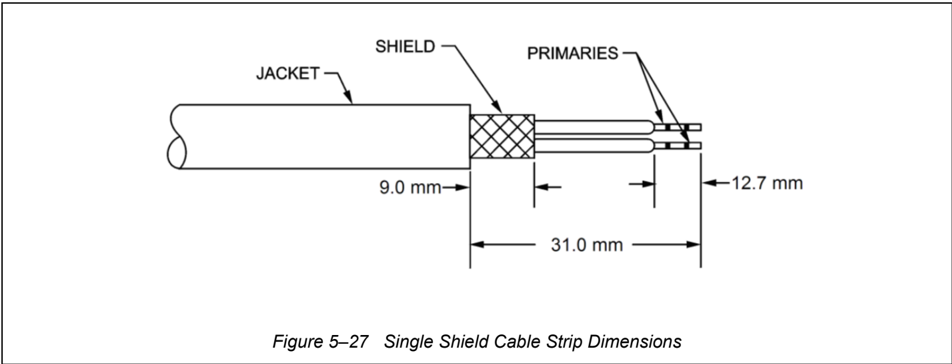
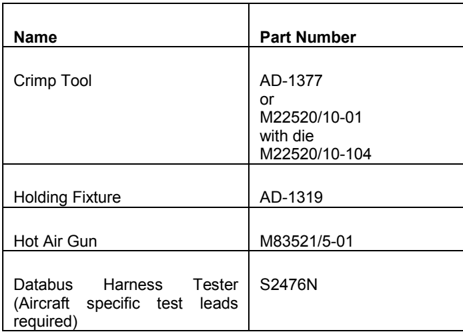
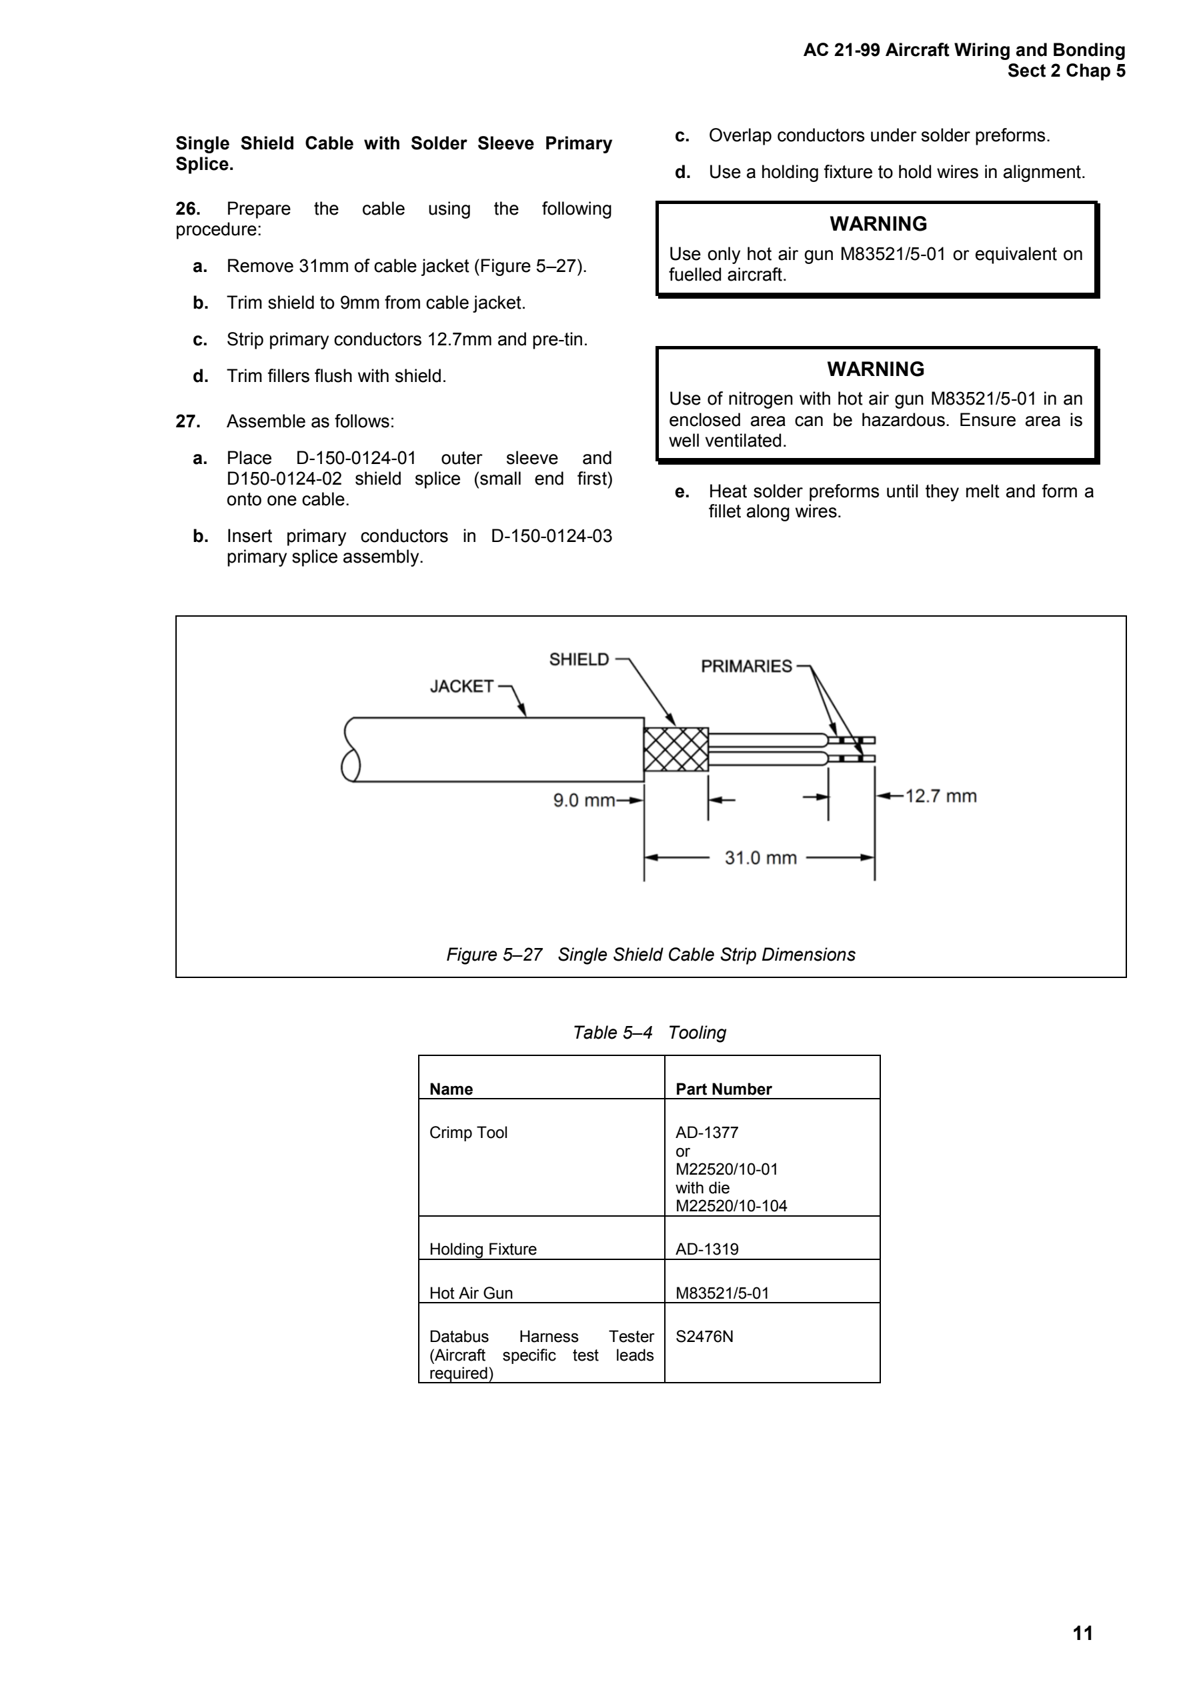

In [6]:
converter = MAUDConverter(
    input_path=pdf_input_path,
    output_dir=output_dir,
    overwrite=True,
    format_options={
                InputFormat.PDF: PdfFormatOption(
                    pipeline_cls=MAUDPipeline,
                    pipeline_options=MAUDPipelineOptions(),
                )
            },
        )   

converter.convert()

In [13]:
converter.save_document()
converter.chunk()

2025-02-24 17:13:28,645 - MAUDConverter - INFO - Saving document


[{'filename': 'wiring_bonding.pdf',
  'input_hash': PosixPath('2e760c98582dd50f45f97cb7cd8f7c4d'),
  'pages': [1],
  'doc_refs': ['#/texts/0',
   '#/texts/1',
   '#/texts/2',
   '#/texts/3',
   '#/texts/4',
   '#/texts/5',
   '#/texts/6',
   '#/texts/7',
   '#/texts/8',
   '#/texts/9',
   '#/texts/10',
   '#/texts/11'],
  'has_table': False,
  'has_picture': False,
  'tables': [],
  'pictures': [],
  'headings': None,
  'captions': None,
  'chunk_type': 'text',
  'image_path': '',
  'text': 'Single  Shield  Cable  with  Solder  Sleeve  Primary Splice.\n26. Prepare the cable using the following procedure:\na. Remove 31mm of cable jacket (Figure 5 -27).\nb. Trim shield to 9mm from cable jacket.\nc. Strip primary conductors 12.7mm and pre-tin.\nd. Trim fillers flush with shield.\n27. Assemble as follows:\na. Place D-150-0124-01 outer sleeve and D150-0124-02  shield  splice  (small  end  first) onto one cable.\nAC 21-99 Aircraft Wiring and Bonding\nSect 2 Chap 5\nc. Overlap conductors unde